Best Pittsburgh Neighborhood Final Report by Patrick Francis and Alex Woo

# Introduction

The **BestPitt Project** aims to analyze arrest, fire incident, and non-traffic citation data across various neighborhoods in Pittsburg Our definition of the best neighborhood in Pittsburgh is based mainly on the safety of the residents. From this, we were able to choose three submetrics that fit our definition.
.


# Our Metrics and Datasets

## **Population Data**
Contains 2010 and 2020 population information for Pittsburgh neighborhoods.
[2020 Census Redistricting Data Extracts](https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts)

## **Arrest Data**
Records of arrests by Pittsburgh police, used to calculate arrests per capita.
[Arrest Data](https://data.wprdc.org/dataset/arrest-data)

## **Fire Incident Data**
Fire incidents responded to by Pittsburgh Bureau of Fire, used to calculate incidents per 1,000 residents.
[Fire Incidents in City of Pittsburgh](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh)

## **Non-Traffic Citation Data**
Records of non-traffic citations issued by Pittsburgh police, used to calculate citations per 1,000 residents.
[Non-Traffic Citations](https://data.wprdc.org/dataset/non-traffic-citations)
 Authority police).
burgh Bureau of Fire.
rt Authority police).
 Pittsburgh Bureau of Fire.
.
ription]


# Our Scaling

We felt arrests would be the most important factor in determining how safe a neighborhood is. Because of this, we assigned point values to our metrics with the scaling as follows:

- **Arrests**: 50 points
- **Fire Incidents**: 25 points
- **Non-Traffic Citations**: 25 points

The lower the amount a neighborhood has of any of these, the higher it ranks, and the more points it gains.


# Arrests

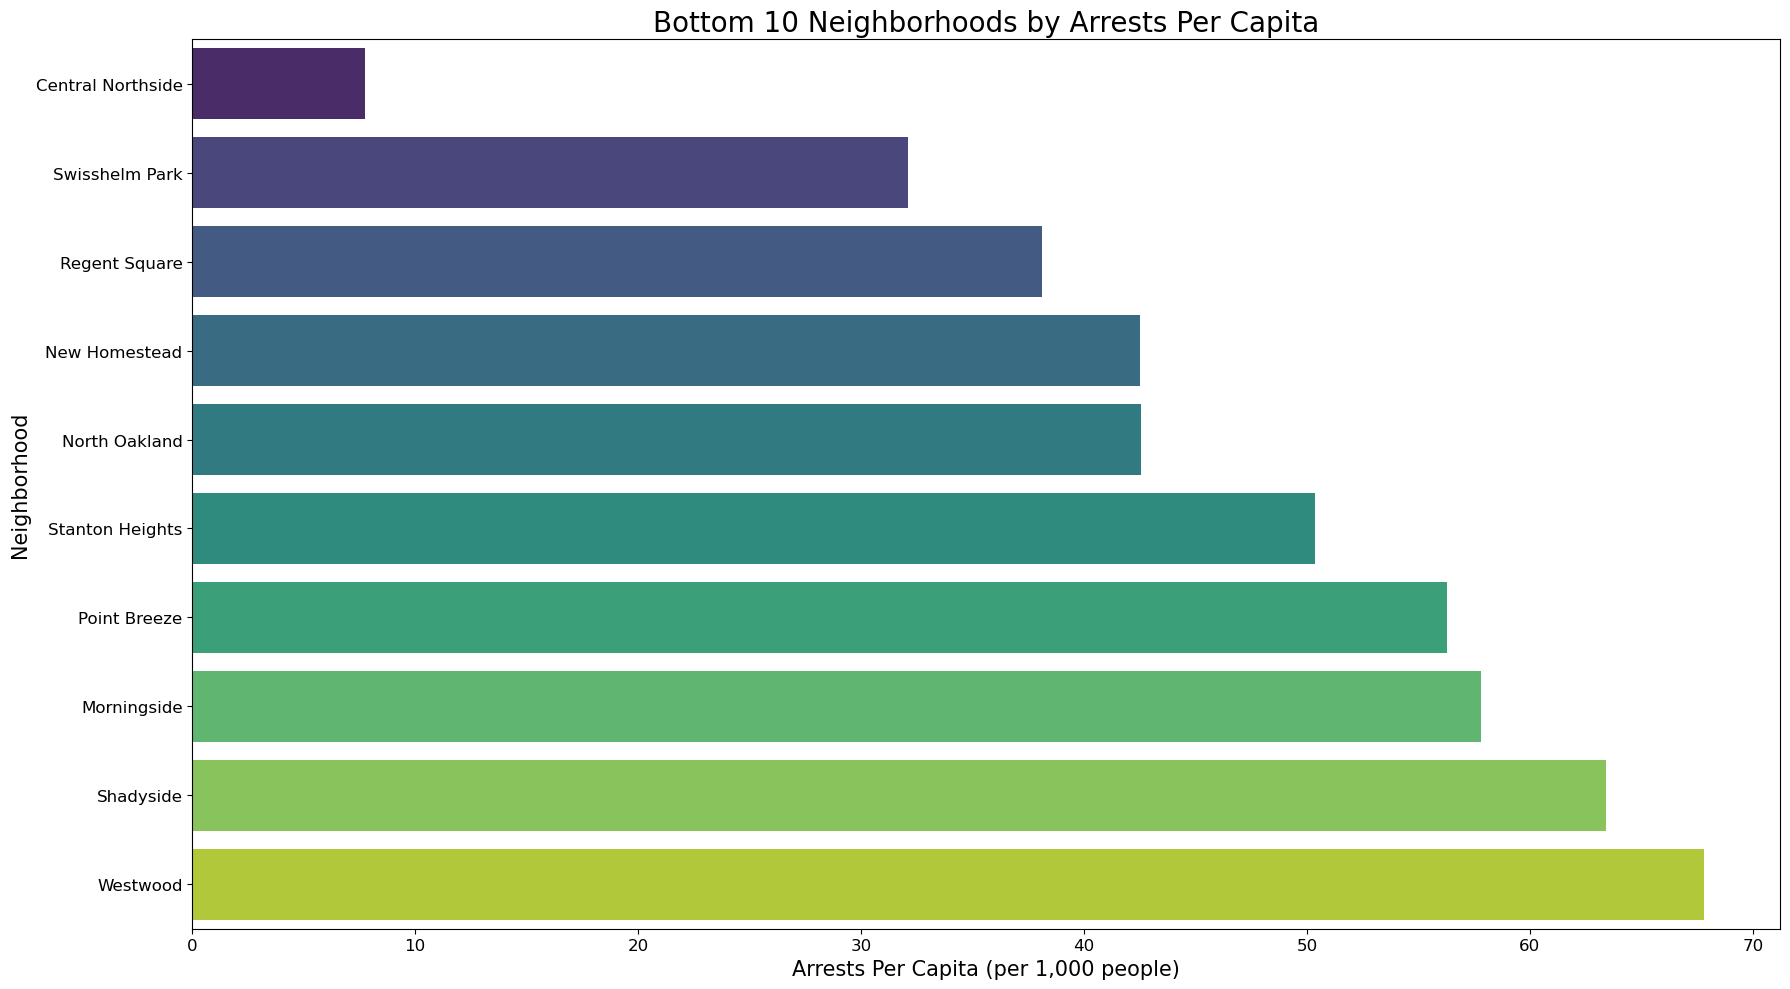

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arrests_data = pd.read_csv('Arrests.csv')
population_data = pd.read_csv('Population.csv')

arrests_data.dropna(subset=['INCIDENTNEIGHBORHOOD'], inplace=True)

arrests_data['INCIDENTNEIGHBORHOOD'] = arrests_data['INCIDENTNEIGHBORHOOD'].astype(str)
population_data['Neighborhood'] = population_data['Neighborhood'].astype(str)

name_corrections = {
    'Lawrenceville South': 'Lawrenceville',
    'Lawrenceville North': 'Lawrenceville',
    'South Side': 'South Side Flats',
    'Southside': 'South Side Flats',
    'Squirrel Hill North': 'Squirrel Hill',
    'Squirrel Hill South': 'Squirrel Hill',
}

arrests_data['INCIDENTNEIGHBORHOOD'] = arrests_data['INCIDENTNEIGHBORHOOD'].replace(name_corrections)
population_data['Neighborhood'] = population_data['Neighborhood'].replace(name_corrections)

arrest_counts = arrests_data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'Arrests']

merged_data = pd.merge(arrest_counts, population_data[['Neighborhood', '2020_Total_Population']], on='Neighborhood')

merged_data['Arrests_Per_Capita'] = (merged_data['Arrests'] / merged_data['2020_Total_Population']) * 1000

bottom_arrests_per_capita = merged_data.nsmallest(10, 'Arrests_Per_Capita')

plt.figure(figsize=(18, 10))  # Increase figure size
sns.barplot(x='Arrests_Per_Capita', y='Neighborhood', hue='Neighborhood', dodge=False, data=bottom_arrests_per_capita, palette='viridis')
plt.title('Bottom 10 Neighborhoods by Arrests Per Capita', fontsize=20)
plt.xlabel('Arrests Per Capita (per 1,000 people)', fontsize=15)
plt.ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.legend([], [], frameon=False)
plt.show()


# Fire

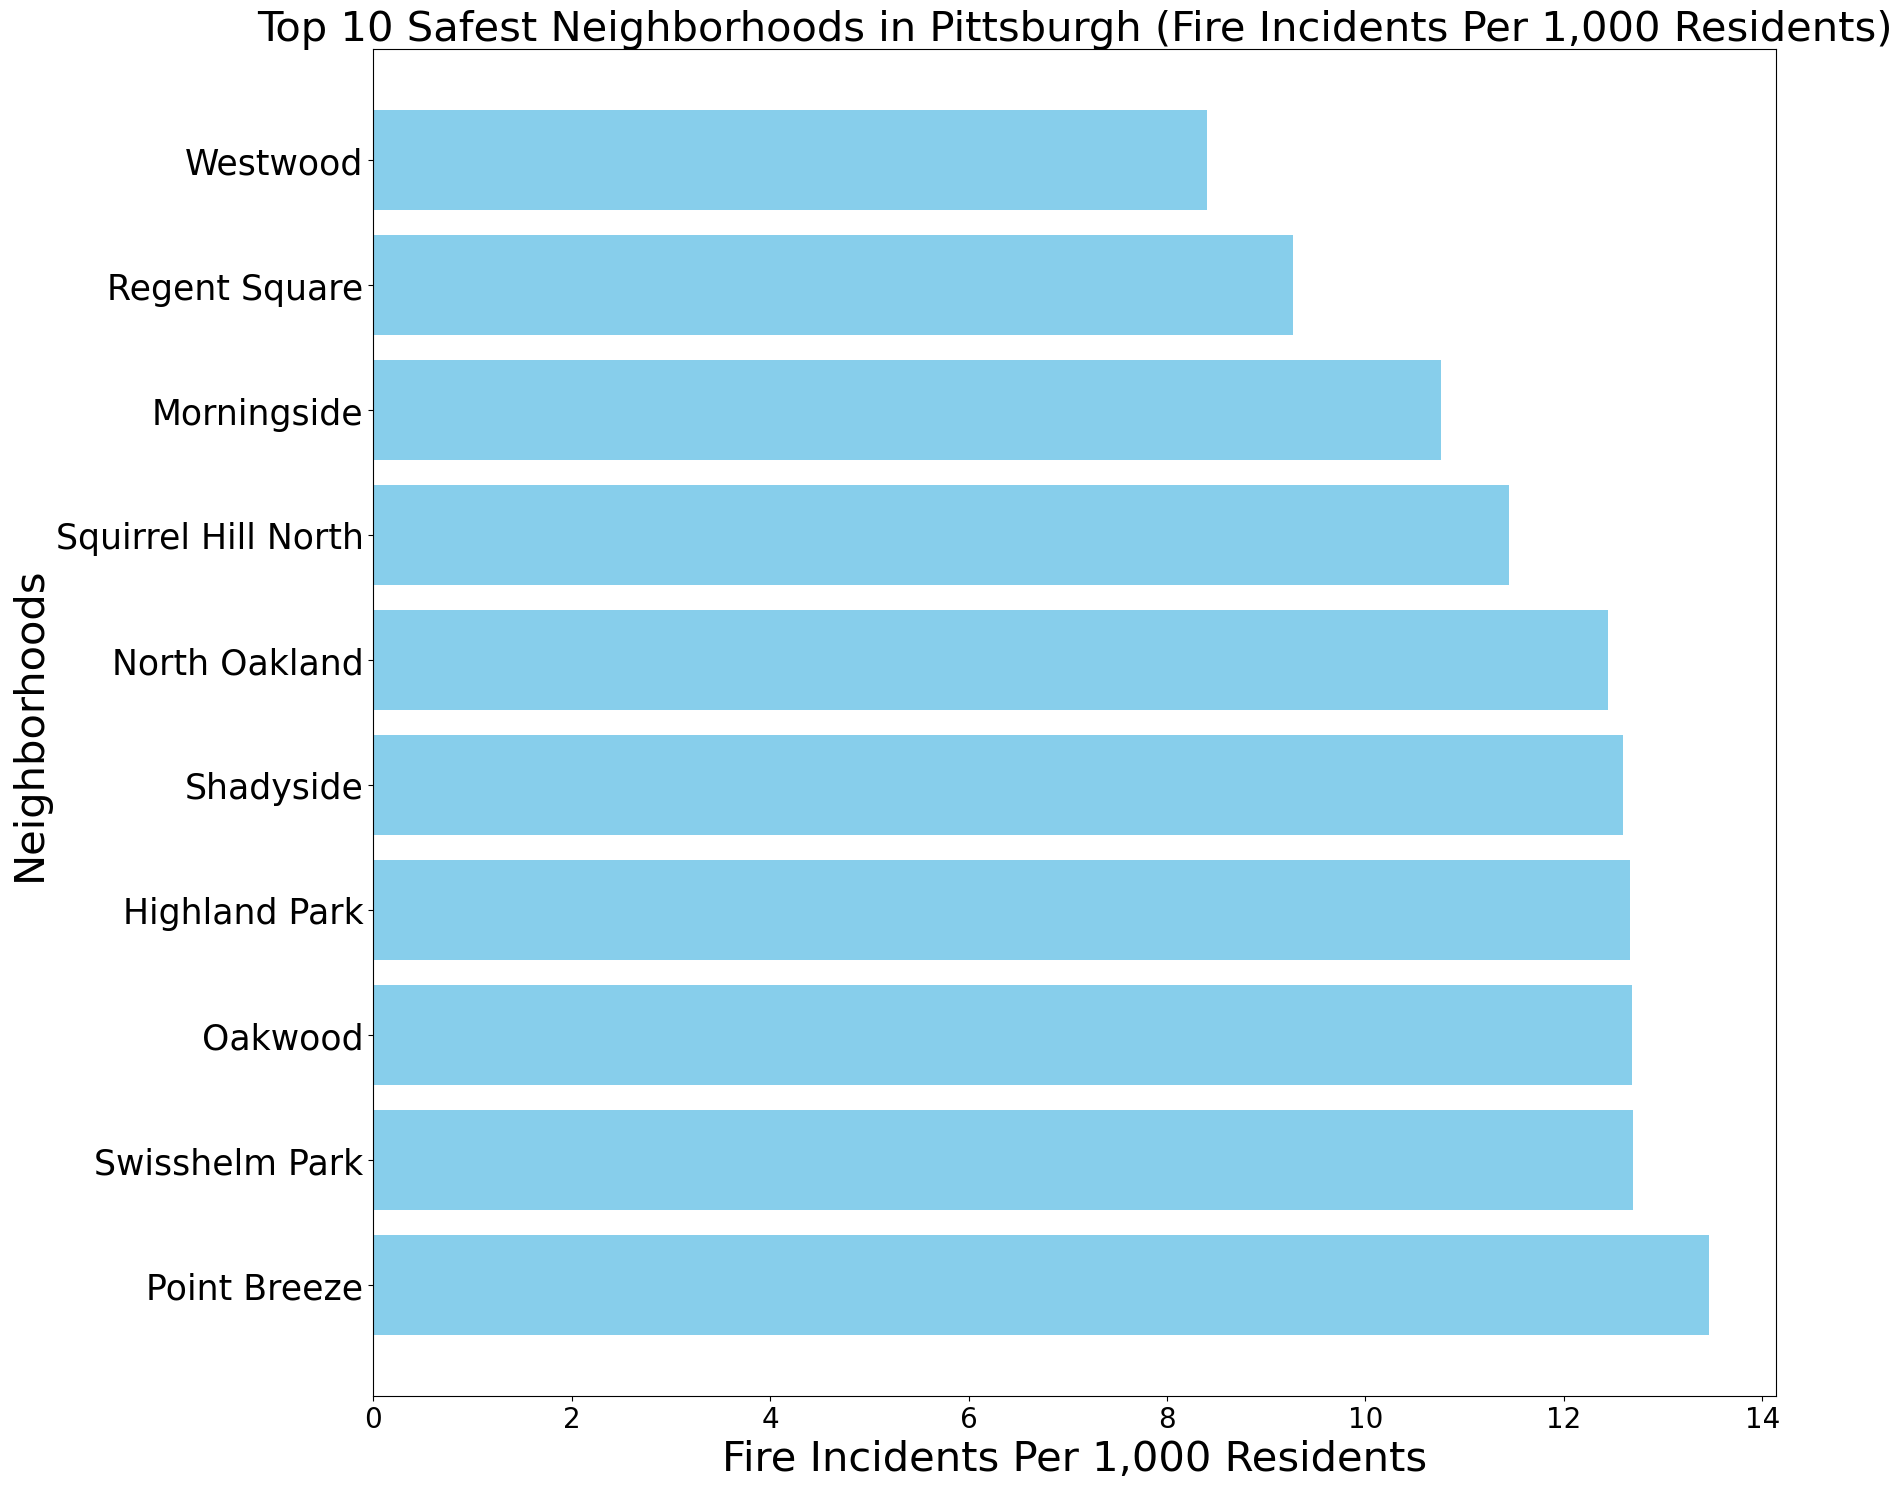

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

population_file_path = 'Population.csv'
fire_file_path = 'Fire.csv'

population_df = pd.read_csv(population_file_path)
fire_df = pd.read_csv(fire_file_path)

population_df = population_df[['Neighborhood', '2020_Total_Population']]
population_df.rename(columns={'2020_Total_Population': 'Population'}, inplace=True)

fire_df['Neighborhood'] = fire_df['neighborhood'].astype(str)
fire_count = fire_df.groupby('Neighborhood').size().reset_index(name='Fire_Count')

combined_data = pd.merge(fire_count, population_df, on='Neighborhood', how='inner')
combined_data = combined_data.groupby('Neighborhood').agg({
    'Fire_Count': 'sum',
    'Population': 'sum'
}).reset_index()

combined_data['Incidents_Per_Thousand'] = (combined_data['Fire_Count'] / combined_data['Population']) * 1000

safest_neighborhoods = combined_data.nsmallest(10, 'Incidents_Per_Thousand').reset_index(drop=True)

plt.figure(figsize=(18, 15))
plt.barh(safest_neighborhoods['Neighborhood'], safest_neighborhoods['Incidents_Per_Thousand'], color='skyblue')
plt.title('Top 10 Safest Neighborhoods in Pittsburgh (Fire Incidents Per 1,000 Residents)', fontsize=30)
plt.xlabel('Fire Incidents Per 1,000 Residents', fontsize=30)
plt.ylabel('Neighborhoods', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Non-Traffic Citations

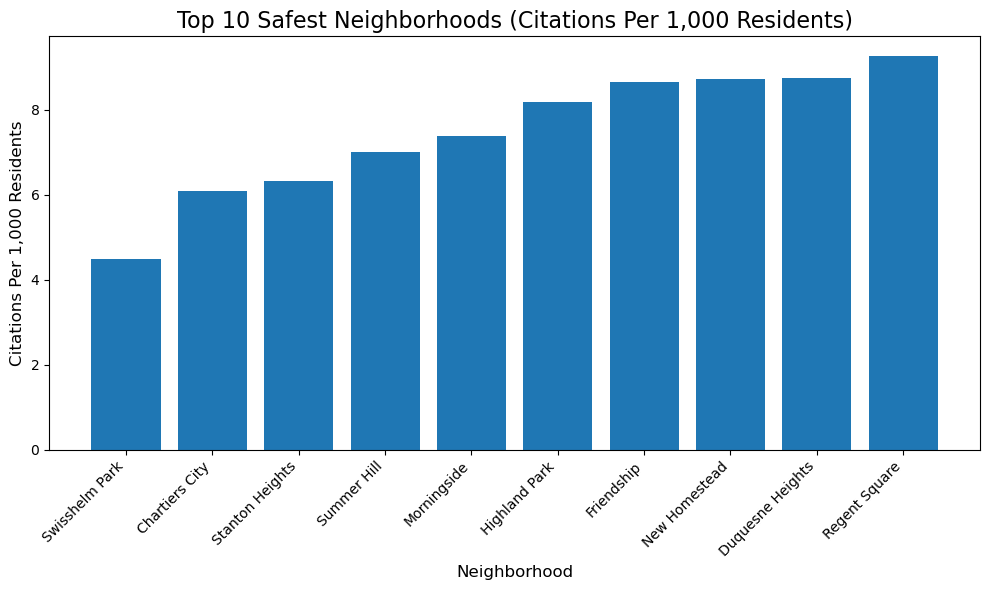

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

population_df = pd.read_csv('Population.csv')
citation_df = pd.read_csv('CITATIONS.csv')

population_df = population_df[['Neighborhood', '2020_Total_Population']]
population_df.rename(columns={'2020_Total_Population': 'Population'}, inplace=True)
citation_df.rename(columns={'NEIGHBORHOOD': 'Neighborhood'}, inplace=True)
citation_count = citation_df.groupby('Neighborhood').size().reset_index(name='Citation_Count')
combined_data = pd.merge(citation_count, population_df, on='Neighborhood', how='inner')
combined_data['Citations_Per_Thousand'] = (combined_data['Citation_Count'] / combined_data['Population']) * 1000
safest_neighborhoods = combined_data.nsmallest(10, 'Citations_Per_Thousand').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(safest_neighborhoods['Neighborhood'], safest_neighborhoods['Citations_Per_Thousand'])
plt.title('Top 10 Safest Neighborhoods (Citations Per 1,000 Residents)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Citations Per 1,000 Residents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()



# Code Explanations

- **Import Libraries:** Import necessary libraries such as pandas for data manipulation, and matplotlib and geopandas for plotting.
- **Load Data:** Read data from CSV files into pandas DataFrames. Sources include local population data and incident data (fire and citations).
- **Clean and Rename Columns:** Select relevant columns and rename them for clarity and consistency.
- **Count Incidents:** Count incidents (fire, citations) per neighborhood.
- **Merge Data:** Combine incident data with population data based on neighborhood names.
- **Calculate Metrics:** Calculate incidents per 1,000 residents to normalize the data.
- **Sort Neighborhoods:** Sort neighborhoods by the calculated metric (incidents per 1,000 residents).
- **Identify Top Neighborhoods:** Select50 or  the top 25 safest neighborhoods.
- **Print Results:** Display the rankings, population, total incidents, and incidents per 1,000 residents for each neighborhood.
- **Graph Results:** Generate visualizations where necessary to better illustrate the data.
 the data.
 the data.
d.
lity.


# Results

## Arrests

Here are the top 50 neighborhoods that had the least arrests per 1,000 residents:

1. **Central Northside** - 50
2. **Swisshelm Park** - 49
3. **Squirrel Hill North** - 48
4. **Regent Square** - 47
5. **New Homestead** - 46
6. **North Oakland** - 45
7. **Stanton Heights** - 44
8. **Squirrel Hill South** - 43
9. **Point Breeze** - 42
10. **East Carnegie** - 41
11. **Westwood** - 40
12. **Morningside** - 39
13. **Summer Hill** - 38
14. **Shadyside** - 37
15. **Lincoln Place** - 36
16. **Banksville** - 35
17. **Duquesne Heights** - 34
18. **Upper Lawrenceville** - 33
19. **Oakwood** - 32
20. **Greenfield** - 31
21. **Chartiers City** - 30
22. **Central Oakland** - 29
23. **Ridgemont** - 28
24. **Windgap** - 27
25. **Highland Park** - 26
26. **Central Lawrenceville** - 25
27. **Friendship** - 24
28. **Overbrook** - 23
29. **South Oakland** - 22
30. **Lower Lawrenceville** - 21
31. **Fairywood** - 20
32. **Brookline** - 19
33. **Bloomfield** - 18
34. **Terrace Village** - 17
35. **West Oakland** - 16
36. **Polish Hill** - 15
37. **Crafton Heights** - 14
38. **Point Breeze North** - 13
39. **Troy Hill** - 12
40. **Brighton Heights** - 11
41. **Beechview** - 10
42. **Perry North** - 9
43. **South Side Slopes** - 8
44. **Mount Washington** - 7
45. **Garfield** - 6
46. **Upper Hill** - 5
47. **Glen Hazel** - 4
48. **Manchester** - 3
49. **Allegheny West** - 2
50. **Carrick** - 1
ter - 3
49. Allegheny West - 2
50. Carrick - 1


## Fire

Here are the top 25 neighborhoods that had the least fire incidents per 1,000 residents:

1. **Westwood** - 25
2. **Regent Square** - 24
3. **Morningside** - 23
4. **Squirrel Hill North** - 22
5. **North Oakland** - 21
6. **Shadyside** - 20
7. **Highland Park** - 19
8. **Oakwood** - 18
9. **Swisshelm Park** - 17
10. **Point Breeze** - 16
11. **Stanton Heights** - 15
12. **Banksville** - 14
13. **Brookline** - 13
14. **Central Lawrenceville** - 12
15. **Central Oakland** - 11
16. **Friendship** - 10
17. **Greenfield** - 9
18. **Duquesne Heights** - 8
19. **Overbrook** - 7
20. **Squirrel Hill South** - 6
21. **Windgap** - 5
22. **Beechview** - 4
23. **Summer Hill** - 3
24. **Bloomfield** - 2
25. **Crafton Heights** - 1
25. Crafton Heights - 1


## Non-Traffic Incidents

Here are the top 25 neighborhoods that had the least non-traffic citations per 1,000 residents:

1. **Swisshelm Park** - 25
2. **Chartiers City** - 24
3. **Stanton Heights** - 23
4. **Summer Hill** - 22
5. **Morningside** - 21
6. **Highland Park** - 20
7. **Friendship** - 19
8. **New Homestead** - 18
9. **Duquesne Heights** - 17
10. **Regent Square** - 16
11. **Banksville** - 15
12. **Point Breeze** - 14
13. **Oakwood** - 13
14. **Ridgemont** - 12
15. **Westwood** - 11
16. **Lower Lawrenceville** - 10
17. **Windgap** - 9
18. **Spring Garden** - 8
19. **Fairywood** - 7
20. **Lincoln Place** - 6
21. **Perry North** - 5
22. **Squirrel Hill North** - 4
23. **Upper Lawrenceville** - 3
24. **Polish Hill** - 2
25. **Upper Hill** - 1


## Combined Points Top 5

Based on the rankings from arrests, fire incidents, and non-traffic citations, the neighborhoods that appeared multiple times had their points combined. Here are the top 5 neighborhoods with the highest combined points:

1. **Swisshelm Park** - 91 points
2. **Regent Square** - 87 points
3. **Morningside** - 83 points
4. **Stanton Heights** - 82 points
5. **Highland Park** - 6 points
 points
5 points


# Best Neighborhood

**Swisshelm Park** - 91 points
- 49 Arrests
- 17 Fire Incidents
- 25 Non-Traffic Violations

Based on its combined score from our metrics, Swisshelm Park is the best neighborhood in Pittsburgh.
sburgh.
burgh.
